In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handle-outlier/placement.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/handle-outlier/placement.csv')

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
637,7.25,74.0,0
876,6.33,20.0,0
627,6.31,30.0,1
557,6.47,25.0,0
498,6.89,14.0,0


In [5]:
df.shape

(1000, 3)

In [6]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
import warnings
warnings.filterwarnings('ignore')

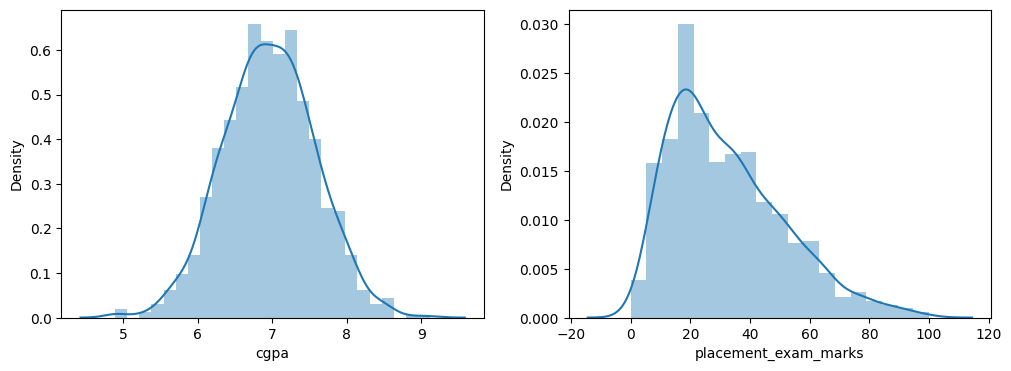

In [9]:
plt.figure(figsize= (12, 4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

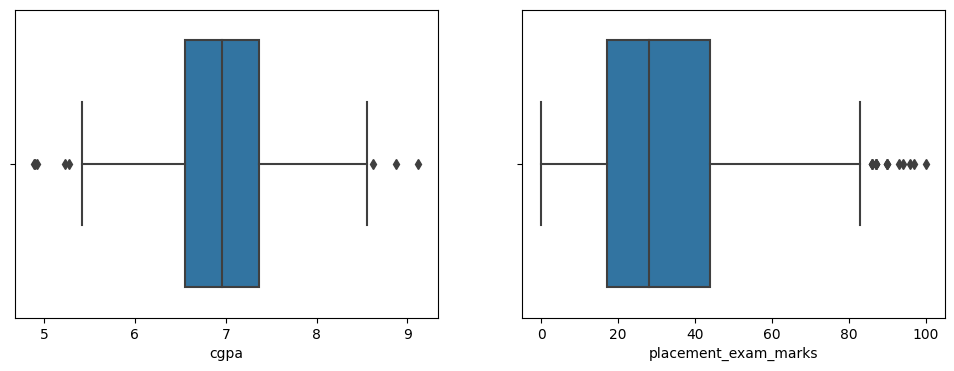

In [10]:
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
sns.boxplot(x= df['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(x= df['placement_exam_marks'])

plt.show()

In [11]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [13]:
print('Mean of the value marks', df['placement_exam_marks'].mean())
print('std value the marks', df['placement_exam_marks'].std())
print('max value of placement', df['placement_exam_marks'].max())
print('min value of placement_exam_marks', df['placement_exam_marks'].min())

Mean of the value marks 32.225
std value the marks 19.13082233892108
max value of placement 100.0
min value of placement_exam_marks 0.0


In [14]:
percentile25= df['placement_exam_marks'].quantile(0.25)
percentile75= df['placement_exam_marks'].quantile(0.75)

In [15]:
percentile75

44.0

In [16]:
IQR= percentile75 - percentile25

In [17]:
lower= percentile25 - 1.5*IQR
upper= percentile75 + 1.5*IQR

In [18]:
outliers= df[(df['placement_exam_marks'] < lower) | (df['placement_exam_marks'] > upper)]

In [19]:
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

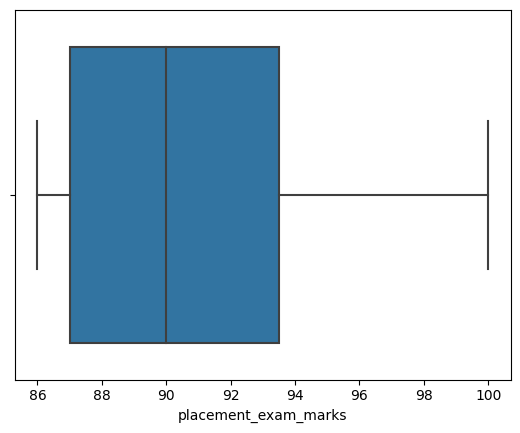

In [21]:
sns.boxplot(x= outliers['placement_exam_marks'])

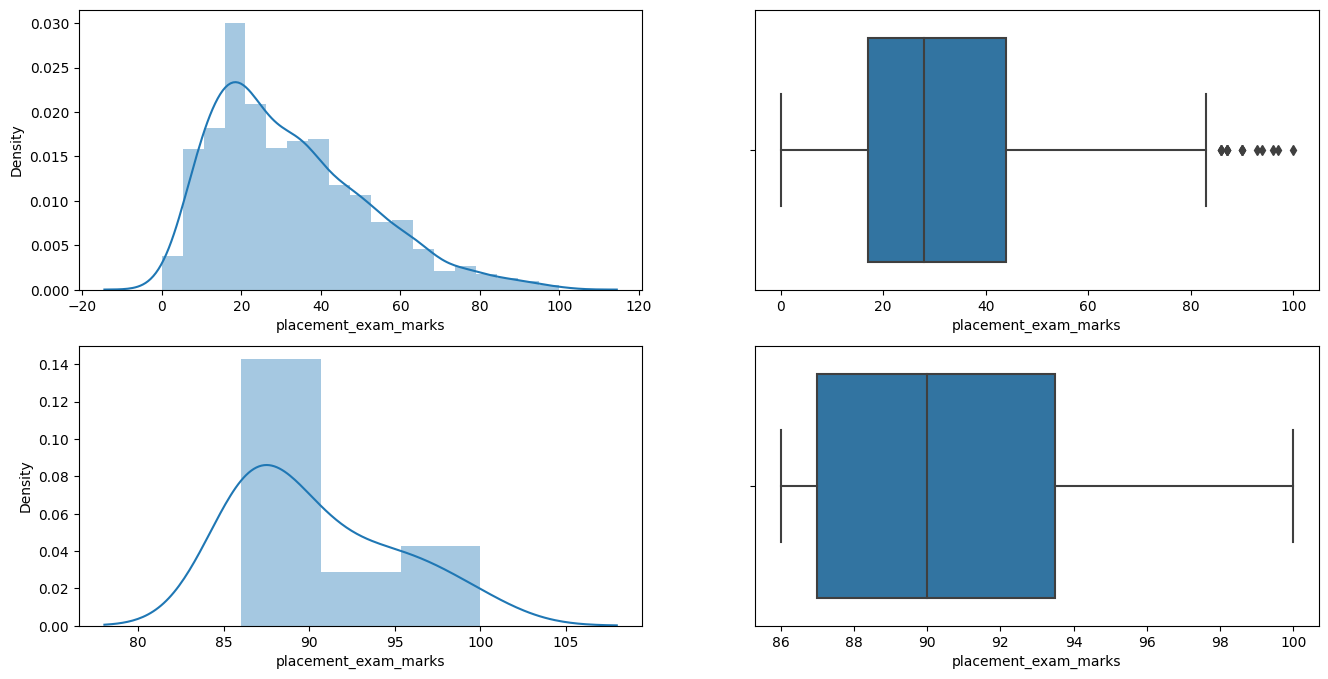

In [22]:
# side-by-side compare
plt.figure(figsize= (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x= df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(outliers['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x= outliers['placement_exam_marks'])

plt.show()

In [23]:
#using IQR capping
new_df= df.copy()
new_df['placement_exam_marks']= np.where(
    new_df['placement_exam_marks'] > upper,
    upper,
    np.where(
        new_df['placement_exam_marks'] < lower,
        lower,
        new_df['placement_exam_marks']
    )
)

<Axes: xlabel='placement_exam_marks'>

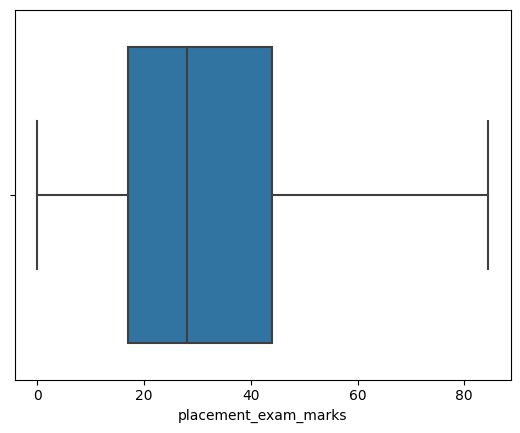

In [24]:
sns.boxplot(x= new_df['placement_exam_marks'])

In [25]:
#using normal capping

upper_limit= df['placement_exam_marks'].mean() + 3*df['placement_exam_marks'].std()
lower_limit= df['placement_exam_marks'].mean() - 3*df['placement_exam_marks'].std()

In [26]:
new_df2= df.copy()

new_df2['placement_exam_marks']= np.where(
    new_df2['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df2['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df2['placement_exam_marks']
    )
)

In [27]:
new_df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks'>

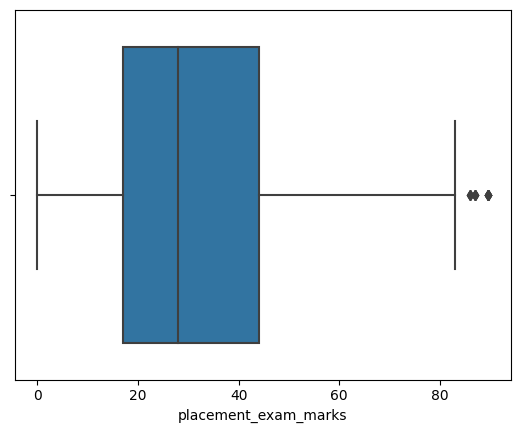

In [28]:
sns.boxplot(x= new_df2['placement_exam_marks'])